In [1]:
%load_ext autoreload

%autoreload 2
import sys
import numpy as np
import matplotlib.pyplot as plt
import see_fits
import scipy
from scipy.ndimage import gaussian_filter
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import abundance as cl_count
import covariance as covar
import utils
import edit
import h5py
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

In [2]:
#datG = see_fits.mean_var_covar('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/weights_old/Gaussian_4x4*')
#datP=see_fits.mean_var_covar('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/weights_old/Poissonian_4x4*')
#datMPG=see_fits.mean_var_covar('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/cosmological_constraints/MPG_20x30*')

In [8]:
binning=['4zx4m']
likelihood=['Poissonian','Gaussian','MPG']
cosmology = {binning[i]:{likelihood_:None for likelihood_ in likelihood} for i in range(len(binning))}
for b in binning:
    try:
        cosmology[b]['Poissonian']=see_fits.mean_var_covar('/sps/lsst/users/cpayerne/1000xsimulations/analysis/'+b+'/mean_dispersion/Poissonian*')
        cosmology[b]['Gaussian']  =see_fits.mean_var_covar('/sps/lsst/users/cpayerne/1000xsimulations/analysis/'+b+'/mean_dispersion/Gaussian*')
        cosmology[b]['MPG']       =see_fits.mean_var_covar('/sps/lsst/users/cpayerne/1000xsimulations/analysis/'+b+'/mean_dispersion/MPG*')
    except: 
        continue

# Forecast

In [9]:
forecast4x4=edit.load_pickle('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/Covariances/Fisher_covariance.pickle')

In [10]:
forecast4x4

{'4zx4m': {'Poissonian': array([[ 3.76873719e-06, -2.05737551e-06],
         [-2.05737551e-06,  1.35418873e-06]]),
  'Gaussian': array([[ 5.75554086e-06, -2.92255360e-06],
         [-2.92255360e-06,  1.87307308e-06]])},
 '20zx30m': {'Poissonian': array([[ 3.27729655e-06, -1.74862855e-06],
         [-1.74862855e-06,  1.16003322e-06]]),
  'Gaussian': array([[ 5.50581960e-06, -2.61932081e-06],
         [-2.61932081e-06,  1.70757569e-06]])},
 '100zx100m': {'Poissonian': array([[ 3.26467069e-06, -1.74077984e-06],
         [-1.74077984e-06,  1.15514867e-06]]),
  'Gaussian': array([[ 4.81543763e-06, -2.33996713e-06],
         [-2.33996713e-06,  1.49188057e-06]])}}

# Mean

Poissonian
Gaussian
MPG


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


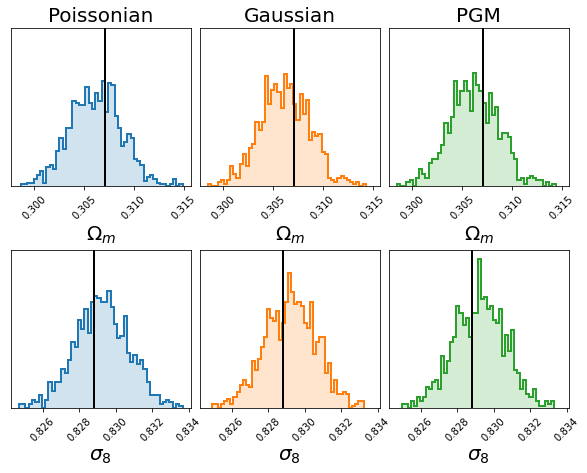

In [13]:
title = ['Poissonian', 'Gaussian', 'PGM']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c',]
n=11
maxsOm=250
maxss8=400
alpha=[.3, .6, .9]
fig, ax = plt.subplots(2, 3, figsize = (10,7), sharex='row', sharey='row')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.05, hspace=.4)
label = ['Poissonian', 'Gaussian', 'MPG']
show = [True, True, True]
ls=['-','-','--']
for k in range(3):
    likelihood_=likelihood[k]
    print(likelihood_)
    for i, b in enumerate(binning):
        if i!=0: continue
        err_norm=1e-3
            #try:
        try:
            
            ax[0,k].vlines(True_value[0],0,maxsOm,ls='-',color='k',linewidth=2)
            ax[1,k].vlines(True_value[1],0,maxss8,ls='-', color='k',linewidth=2)
            x=np.array(cosmology[b][likelihood_]['Om'])#/np.std(cosmology[b][likelihood_]['Om'])-1
            y=np.array(cosmology[b][likelihood_]['s8'])#/np.std(cosmology[b][likelihood_]['s8'])-1
            #cov=np.cov(x,y)
            for s,x_ in enumerate([x,y]):
                hist,x_edges =np.histogram(x_, bins=50)
                x_middle=np.array([(x_edges[i]+x_edges[i+1])/2 for i in range(len(x_edges)-1)])
                y=gaussian_filter(hist, sigma=1.5)
                if s==0: 
                    label=b
                else:label=None
                #ax[s,k].fill_between(x_middle,x_middle*0, y/scipy.integrate.simps(y,x_middle),
                 #                    color=colors[k], alpha=alpha[i],edgecolor="k", label=b)
                #ax[s,k].plot(x_middle, y/scipy.integrate.simps(y,x_middle),
                 #                    color=colors[i], alpha=1, label=b)
                ax[s,k].hist(x_, density=True, bins=50, color=colors[k],linewidth=2, alpha=.2)
                ax[s,k].hist(x_, density=True, bins=50, histtype='step',color=colors[k],linewidth=2)
             
        except: a=1

    #except: continue
for i in range(2):
    for j in range(3):
        ax[0,0].legend(frameon=False, fontsize=12, loc='upper left')
        ax[0,j].set_title(title[j], fontsize=20)
        ax[0,j].set_xlabel(r'$\Omega_m$', fontsize = 20)
        ax[1,j].set_xlabel(r'$\sigma_8$', fontsize = 20)
        ax[i,j].tick_params(axis='both', which = 'major', labelsize= 10)
        ax[0,j].set_ylim(0,maxsOm)
        ax[1,j].set_ylim(0,maxss8)
        ax[i,j].tick_params(axis='x', rotation=45)
        ax[i,j].set_yticks([], minor=False)
#plt.savefig('best_fit_distribution.pdf', bbox_inches='tight', dpi=300)